## Importing Libraries and Dataset:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('F:/Data Science/Data Sets/IPL Dataset/ipl_dataset_cleaned.csv')

In [3]:
df.head(2)

,Unnamed: 0,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target,crr,rrr,result
0,0,Delhi Daredevils,Deccan Chargers,Delhi,41,25,5,158,7.389474,9.84,1
1,1,Kings XI Punjab,Mumbai Indians,Chandigarh,49,12,5,190,7.833333,24.50,0


## Preprocessing:

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head(2)

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target,crr,rrr,result
0,Delhi Daredevils,Deccan Chargers,Delhi,41,25,5,158,7.389474,9.84,1
1,Kings XI Punjab,Mumbai Indians,Chandigarh,49,12,5,190,7.833333,24.50,0


### Solving NaN value Problem:

In [6]:
df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets_left      0
target            0
crr               0
rrr               5
result            0
dtype: int64

In [7]:
df.shape

(72413, 10)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(71576, 10)

### Solving infinite value problem:

In [10]:
df.describe()

,runs_left,balls_left,wickets_left,target,crr,rrr,result
count,71576.000000,71576.000000,71576.000000,71576.000000,71576.000000,7.157600e+04,71576.000000
mean,93.383313,62.673159,7.537904,166.767841,7.449324,NaN,0.525246
std,50.058881,33.398497,2.139570,29.291819,2.277979,NaN,0.499366
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-inf,0.000000
25%,54.000000,35.000000,6.000000,148.000000,6.272727,7.272727e+00,0.000000
50%,93.000000,63.000000,8.000000,166.000000,7.500000,9.000000e+00,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.696629,1.106422e+01,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,inf,1.000000


- Here, 'rrr' column contains '-inf' and 'inf' values.
- This happens in the dataset only when 'balls_left' as 0.
- So we need to select only those rows wich does not have 'balls_left as 0.

In [11]:
df = df[df['balls_left'] != 0]

In [12]:
df.describe()

,runs_left,balls_left,wickets_left,target,crr,rrr,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,93.621065,62.878725,7.553251,166.726963,7.447791,10.568474,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,14.041845,0.499293
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,148.000000,6.265782,7.267606,0.000000
50%,93.000000,64.000000,8.000000,166.000000,7.500000,9.000000,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.696385,11.032258,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,684.000000,1.000000


### Defining features and targets:

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X.shape, y.shape

((71342, 9), (71342,))

### Train Test Split:

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
X_train.shape, y_train.shape

((57073, 9), (57073,))

In [18]:
X_test.shape, y_test.shape

((14269, 9), (14269,))

### One Hot Encoding:

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
X.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'target', 'crr', 'rrr'],
      dtype='object')

In [21]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

## Model Building:

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [23]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [24]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [25]:
y_pred = pipe.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.8074146751699488

In [28]:
pipe.predict_proba(X_test)[0]

array([0.18428768, 0.81571232])

## Analysis of a match ball-by-ball:

In [29]:
delivery_df = pd.read_csv('F:/Data Science/Data Sets/IPL Dataset/delivery_df_cleaned.csv')

In [38]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','target','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['target'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [39]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
4882,1,4,0,56.7,43.3
4890,2,8,0,51.6,48.4
4896,3,1,0,58.4,41.6
4902,4,7,1,69.9,30.1
4908,5,12,0,59.9,40.1
4914,6,13,0,47.6,52.4
4920,7,9,0,41.7,58.3
4928,8,15,0,27.8,72.2
4934,9,7,0,25.7,74.3
4941,10,17,0,14.1,85.9


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Target-179')

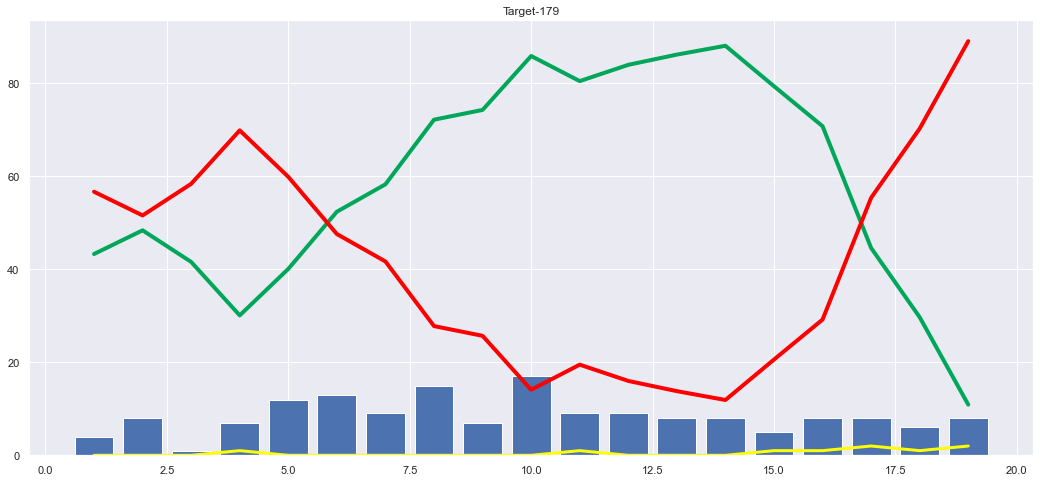

In [42]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [43]:
import pickle
pickle.dump(pipe,open('F:/Data Science/Data Sets/IPL Dataset/pipe.pkl','wb'))